In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp

In [2]:
pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 125 kB 15.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
import warnings
warnings.filterwarnings('ignore')

#import natural language toolkit
import nltk

# download stopwords & punkt
nltk.download('stopwords')
nltk.download('punkt')
# get lexicon we'll be working with today
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /home/tal012/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/tal012/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/tal012/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.read_csv('reduced_comments.csv')

/tmp/ipykernel_129/1840870367.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('reduced_comments.csv')


In [4]:
df

Unnamed: 0       id                author created_utc  \
0               0  c1t2qoh             shiftup72  1304911368   
1               1  c1t2xci            JaspaBones  1304913427   
2               2  c1vpoa5         elishawellman  1306229203   
3               3  c1wrsx1         elishawellman  1306741132   
4               4  c53pg9w             minerva_K  1340304552   
...           ...      ...                   ...         ...   
271257     271256  j2fxf16             rossth760  1672531089   
271258     271257  j2fxhbd  Clean-Advertising-67  1672531116   
271259     271258  j2fxk1m       Catlady_Pilates  1672531148   
271260     271259  j2fxl8f  Clean-Advertising-67  1672531162   
271261     271260  j2fxn9n  WordAffectionate3251  1672531187   

                                                     body  \
0                             Also, hot flashes. Amirite?   
1                     From what I hear he's a solid dude.   
2       Read informative article about menopause and i...   
3       Great information on how to balance mental sta...   
4       I'd be happy to help moderate, if you like, an...   
...                                                   ...   
271257  All the “usual advice”. But I say we start wit...   
271258  When I wake at 3am then I often have a cigaret...   
271259  I think many people would pay for it.  Having ...   
271260  Is that not a good thing? I shave there and wo...   
271261  I don't mind the graying, the thinning hair do...   

                                                permalink     link_id  \
0                                                     NaN    t3_h71nm   
1                                                     NaN    t3_h71nm   
2                                                     NaN    t3_hirtq   
3                                                     NaN    t3_hnci7   
4                                                     NaN    t3_vdcl0   
...                                                   ...         ...   
271257  /r/Menopause/comments/10058dp/how_can_we_make_...  t3_10058dp   
271258  /r/Menopause/comments/zzp3wr/insomnia_around_3...   t3_zzp3wr   
271259  /r/Menopause/comments/zzh2ui/menopause_coach_s...   t3_zzh2ui   
271260  /r/Menopause/comments/1003srk/no_one_warned_me...  t3_1003srk   
271261  /r/Menopause/comments/1003srk/no_one_warned_me...  t3_1003srk   

         parent_id  
0         t3_h71nm  
1         t3_h71nm  
2         t3_hirtq  
3         t3_hnci7  
4       t1_c53j677  
...            ...  
271257  t3_10058dp  
271258   t3_zzp3wr  
271259  t1_j2fethm  
271260  t3_1003srk  
271261  t3_1003srk  

[271262 rows x 8 columns]

In [5]:
df.columns


Index(['Unnamed: 0', 'id', 'author', 'created_utc', 'body', 'permalink',
       'link_id', 'parent_id'],
      dtype='object')

In [6]:
df[['body']]

body
0                             Also, hot flashes. Amirite?
1                     From what I hear he's a solid dude.
2       Read informative article about menopause and i...
3       Great information on how to balance mental sta...
4       I'd be happy to help moderate, if you like, an...
...                                                   ...
271257  All the “usual advice”. But I say we start wit...
271258  When I wake at 3am then I often have a cigaret...
271259  I think many people would pay for it.  Having ...
271260  Is that not a good thing? I shave there and wo...
271261  I don't mind the graying, the thinning hair do...

[271262 rows x 1 columns]

In [7]:
df.rename(columns={'body': 'posts'}, inplace=True)

In [8]:
df

Unnamed: 0       id                author created_utc  \
0               0  c1t2qoh             shiftup72  1304911368   
1               1  c1t2xci            JaspaBones  1304913427   
2               2  c1vpoa5         elishawellman  1306229203   
3               3  c1wrsx1         elishawellman  1306741132   
4               4  c53pg9w             minerva_K  1340304552   
...           ...      ...                   ...         ...   
271257     271256  j2fxf16             rossth760  1672531089   
271258     271257  j2fxhbd  Clean-Advertising-67  1672531116   
271259     271258  j2fxk1m       Catlady_Pilates  1672531148   
271260     271259  j2fxl8f  Clean-Advertising-67  1672531162   
271261     271260  j2fxn9n  WordAffectionate3251  1672531187   

                                                    posts  \
0                             Also, hot flashes. Amirite?   
1                     From what I hear he's a solid dude.   
2       Read informative article about menopause and i...   
3       Great information on how to balance mental sta...   
4       I'd be happy to help moderate, if you like, an...   
...                                                   ...   
271257  All the “usual advice”. But I say we start wit...   
271258  When I wake at 3am then I often have a cigaret...   
271259  I think many people would pay for it.  Having ...   
271260  Is that not a good thing? I shave there and wo...   
271261  I don't mind the graying, the thinning hair do...   

                                                permalink     link_id  \
0                                                     NaN    t3_h71nm   
1                                                     NaN    t3_h71nm   
2                                                     NaN    t3_hirtq   
3                                                     NaN    t3_hnci7   
4                                                     NaN    t3_vdcl0   
...                                                   ...         ...   
271257  /r/Menopause/comments/10058dp/how_can_we_make_...  t3_10058dp   
271258  /r/Menopause/comments/zzp3wr/insomnia_around_3...   t3_zzp3wr   
271259  /r/Menopause/comments/zzh2ui/menopause_coach_s...   t3_zzh2ui   
271260  /r/Menopause/comments/1003srk/no_one_warned_me...  t3_1003srk   
271261  /r/Menopause/comments/1003srk/no_one_warned_me...  t3_1003srk   

         parent_id  
0         t3_h71nm  
1         t3_h71nm  
2         t3_hirtq  
3         t3_hnci7  
4       t1_c53j677  
...            ...  
271257  t3_10058dp  
271258   t3_zzp3wr  
271259  t1_j2fethm  
271260  t3_1003srk  
271261  t3_1003srk  

[271262 rows x 8 columns]

In [9]:
# drop null values
df.dropna(subset=['posts'], inplace=True)

In [10]:
# get the length or number of words per post
df['word_count'] = df['posts'].apply(lambda x: len(x.split()))

# Calculate the average number of words per post
average_words_per_post = df['word_count'].mean()

print("Average words per post:", average_words_per_post)

Average words per post: 48.990547744214


In [11]:
df.head()

Unnamed: 0       id         author created_utc  \
0          0  c1t2qoh      shiftup72  1304911368   
1          1  c1t2xci     JaspaBones  1304913427   
2          2  c1vpoa5  elishawellman  1306229203   
3          3  c1wrsx1  elishawellman  1306741132   
4          4  c53pg9w      minerva_K  1340304552   

                                               posts permalink   link_id  \
0                        Also, hot flashes. Amirite?       NaN  t3_h71nm   
1                From what I hear he's a solid dude.       NaN  t3_h71nm   
2  Read informative article about menopause and i...       NaN  t3_hirtq   
3  Great information on how to balance mental sta...       NaN  t3_hnci7   
4  I'd be happy to help moderate, if you like, an...       NaN  t3_vdcl0   

    parent_id  word_count  
0    t3_h71nm           4  
1    t3_h71nm           8  
2    t3_hirtq           8  
3    t3_hnci7          11  
4  t1_c53j677          45

In [12]:
def remove_punctuation(post):
    # make posts lowercase
    post = post.lower()

    # remove punctuation
    post = re.sub(r'[^a-zA-Z\s]', ' ', post)
    
    # Remove words with repeated letters
    post = re.sub(r'([a-zA-Z])\1+', r'\1', post)
    
    return post

In [13]:
df['posts'] = df['posts'].apply(remove_punctuation)

In [14]:
df.head()

Unnamed: 0       id         author created_utc  \
0          0  c1t2qoh      shiftup72  1304911368   
1          1  c1t2xci     JaspaBones  1304913427   
2          2  c1vpoa5  elishawellman  1306229203   
3          3  c1wrsx1  elishawellman  1306741132   
4          4  c53pg9w      minerva_K  1340304552   

                                               posts permalink   link_id  \
0                        also  hot flashes  amirite        NaN  t3_h71nm   
1                from what i hear he s a solid dude        NaN  t3_h71nm   
2  read informative article about menopause and i...       NaN  t3_hirtq   
3  great information on how to balance mental sta...       NaN  t3_hnci7   
4  i d be hapy to help moderate  if you like  and...       NaN  t3_vdcl0   

    parent_id  word_count  
0    t3_h71nm           4  
1    t3_h71nm           8  
2    t3_hirtq           8  
3    t3_hnci7          11  
4  t1_c53j677          45

In [15]:
analyzer = SentimentIntensityAnalyzer()

# Function to remove stopwords
def remove_stopwords(text):
    # use default English stopwords
    stop_words = set(stopwords.words('english'))
    # tokenize words
    word_tokens = word_tokenize(text)
    # exclude stopwords
    filtered_text = [word for word in word_tokens if word not in stop_words]
    # return clean posts
    return ' '.join(filtered_text)

# Apply Stopword Removal 
df['clean_posts'] = df['posts'].apply(remove_stopwords)


In [16]:
df.head()

Unnamed: 0       id         author created_utc  \
0          0  c1t2qoh      shiftup72  1304911368   
1          1  c1t2xci     JaspaBones  1304913427   
2          2  c1vpoa5  elishawellman  1306229203   
3          3  c1wrsx1  elishawellman  1306741132   
4          4  c53pg9w      minerva_K  1340304552   

                                               posts permalink   link_id  \
0                        also  hot flashes  amirite        NaN  t3_h71nm   
1                from what i hear he s a solid dude        NaN  t3_h71nm   
2  read informative article about menopause and i...       NaN  t3_hirtq   
3  great information on how to balance mental sta...       NaN  t3_hnci7   
4  i d be hapy to help moderate  if you like  and...       NaN  t3_vdcl0   

    parent_id  word_count                                        clean_posts  
0    t3_h71nm           4                           also hot flashes amirite  
1    t3_h71nm           8                                    hear solid dude  
2    t3_hirtq           8        read informative article menopause symptoms  
3    t3_hnci7          11  great information balance mental state fluctua...  
4  t1_c53j677          45  hapy help moderate like help flog place defini...

In [17]:
sentiment_scores = df['clean_posts'].apply(lambda x: analyzer.polarity_scores(x))

In [18]:
sentiment_scores

0         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1         {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...
2         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3         {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...
4         {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'comp...
                                ...                        
271257    {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...
271258    {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...
271259    {'neg': 0.085, 'neu': 0.683, 'pos': 0.232, 'co...
271260    {'neg': 0.208, 'neu': 0.308, 'pos': 0.485, 'co...
271261    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: clean_posts, Length: 271258, dtype: object

In [19]:
sentiment_scores = df['clean_posts'].apply(lambda x: analyzer.polarity_scores(x))

# Convert the Series of dictionaries into a DataFrame
sentiment_df = pd.DataFrame(list(sentiment_scores))


In [29]:

# Filter the DataFrame to find sentences with neg score >= 0.9
filtered_indices_neg = sentiment_df[sentiment_df['neg'] ==1].index

# Retrieve the corresponding sentences from the DataFrame
filtered_sentences_neg = df.loc[filtered_indices_neg, 'clean_posts']
print("Sentences with a negative score = 1:")
for idx, sentence in filtered_sentences_neg.items():
    print(f"Index {idx}: {sentence}")

Sentences with a negative score = 1:
Index 749: panic
Index 1355: damn
Index 1388: regret
Index 2847: alone
Index 2966: strange
Index 3041: seriously wrong
Index 3274: damned frustrating
Index 3654: anxiety
Index 4043: scares bad
Index 4485: spam spam spam spam
Index 5557: worst
Index 6091: worst
Index 6353: hate
Index 7691: exhaustion bitch
Index 9254: wth
Index 9380: insane
Index 10166: seriously
Index 12458: anxiety
Index 12502: scary
Index 13600: hurt
Index 14046: sucks
Index 14471: traumatic
Index 15015: scary
Index 15347: stinks scary
Index 15858: weird
Index 16072: alas
Index 17045: stinks
Index 17221: ugh
Index 18482: awful ugh
Index 18582: idk jealous
Index 18615: ugh
Index 19338: ugh
Index 20292: rude
Index 20485: angry
Index 20494: fuck
Index 20496: exhausting
Index 20508: miserable
Index 20510: infuriating
Index 20511: frustrating
Index 20544: unstable
Index 20727: chaotic
Index 21226: fuck
Index 21512: fuck
Index 21591: liar
Index 22263: alone
Index 22332: sucks
Index 2371

In [21]:
from collections import Counter
import re

# Assuming df and analyzer are already defined
# Calculate sentiment scores for each post
sentiment_scores = df['clean_posts'].apply(lambda x: analyzer.polarity_scores(x))

# Convert the Series of dictionaries into a DataFrame
sentiment_df = pd.DataFrame(list(sentiment_scores))

# Filter the DataFrame to find sentences with neg score >= 0.9
filtered_indices_neg = sentiment_df[sentiment_df['neg'] >= 0.9].index

# Retrieve the corresponding sentences from the DataFrame
filtered_sentences_neg = df.loc[filtered_indices_neg, 'clean_posts']

# Tokenize the sentences and calculate word frequencies
word_counts = Counter()
for sentence in filtered_sentences_neg:
    # Tokenize the sentence
    words = re.findall(r'\w+', sentence.lower())  # Convert to lowercase and split into words
    # Update the word frequency counter
    word_counts.update(words)

# Find the most common word
most_common_word, frequency = word_counts.most_common(1)[0]

# Display the most common word and its frequency
print(f"The most common word is '{most_common_word}' with a frequency of {frequency}.")

The most common word is 'like' with a frequency of 87.


In [30]:
filtered_indices_neu = sentiment_df[sentiment_df['neu'] ==1].index

# Retrieve the corresponding sentences from the DataFrame
filtered_sentences_neu = df.loc[filtered_indices_neu, 'clean_posts']
print("Sentences with a neu score = 1:")
for idx, sentence in filtered_sentences_neu.items():
    print(f"Index {idx}: {sentence}")

Sentences with a neu score = 1:
Index 0: also hot flashes amirite
Index 2: read informative article menopause symptoms
Index 8: think
Index 9: steps depresion fre life
Index 26: optometrist worked chain eyeglas place sold brand asked eye drynes basicaly omega fish oil
Index 28: ask doc topical creams include tiny amounts estrogen estradiol premarin estrace others non hormonal often available otc typicaly aply every day weks twice wek neded
Index 37: already
Index 44: agre science smeled bit fishy
Index 47: thoughts wel paid post
Index 50: waiting punchline
Index 66: click register
Index 72: sory hear peri also much older young facing phase doctors given explanation hapening
Index 105: time
Index 107: separate subredit perimenopause last years say post
Index 125: ive never heard symptom edit gogled
Index 132: might start new doc
Index 133: agre se change docs would also think hormone levels checked trying type replacement therapy think ned symptoms
Index 139: check r fasting
Index 148: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Index 194138: extremely sensitive progesterone wel thankfuly found dr wiling work determined kep taking beloved estrogen take progesterone vaginaly tiny doses often tolerate often monitor endometrial lining ultrasound every months make sure developing hyperplasia
Index 194139: definitely start taking ned waited weks post surgery completely flored balance risks psychosis brought taking nearly kiled exageration saying sadly could tomorow ben smothering head toe estrogel day one prepare enough surgical menopause wishing best
Index 194141: never manifest everyone diferently
Index 194143: ful menopause past year
Index 194144: important meting carer sudenly wil fel light heat milion suns within atempt sweat makeup distinct sweat marks clothes also fighting apear coherent rather molten lava mine started peri
Index 194147: sory thanks making fel like alone
Index 194150: first day teaching colege waiting line xerox sylabus mailrom course favorite raty old punk tshirt underneath sweater god luck

In [31]:
filtered_indices_pos = sentiment_df[sentiment_df['pos'] ==1].index

# Retrieve the corresponding sentences from the DataFrame
filtered_sentences_pos = df.loc[filtered_indices_pos, 'clean_posts']
print("Sentences with a pos score = 1:")
for idx, sentence in filtered_sentences_pos.items():
    print(f"Index {idx}: {sentence}")

Sentences with a pos score = 1:
Index 10: great
Index 36: sigh
Index 99: lol
Index 172: thank
Index 326: thank sharing
Index 407: yes
Index 491: god luck
Index 538: great
Index 609: glad like
Index 655: hope
Index 657: thanks
Index 669: god luck
Index 714: thanks
Index 737: welcome
Index 871: yes thank
Index 996: congrats
Index 997: thank
Index 998: yay
Index 1000: congratulations
Index 1001: thank
Index 1026: congrats
Index 1027: thank
Index 1057: great thanks
Index 1125: amazing
Index 1156: yes
Index 1198: thanks
Index 1248: awesome thank
Index 1251: glorious
Index 1255: nice
Index 1347: best
Index 1352: thank
Index 1353: nice enjoy
Index 1366: thank
Index 1671: thank
Index 1698: thank
Index 1702: yep solutions
Index 1771: interesting
Index 1793: thank
Index 1814: pleasure
Index 1933: true
Index 1935: awesome
Index 1938: thank
Index 1942: thanks sharing
Index 1971: thank
Index 2005: lol
Index 2030: congrats
Index 2031: congratulations
Index 2206: thanks
Index 2210: sigh
Index 2280: y

In [25]:
# Find the index of the post with the most negative score
most_comp_index = sentiment_df['compound'].idxmax()

# Retrieve the sentence with the most negative score
most_comp_sentence = df.loc[most_comp_index, 'clean_posts']

# Display the most comp sentence and its negative score
print("Sentence with the most comp score:")
print(most_comp_sentence)
print("\nComp score:", sentiment_df.loc[most_comp_index, 'compound'])

Sentence with the most comp score:
listened hope helpful

Comp score: 0.9992


In [44]:
filtered_indices_comp = sentiment_df[sentiment_df['compound'] >0.999].index

# Retrieve the corresponding sentences from the DataFrame
filtered_sentences_comp = df.loc[filtered_indices_comp, 'clean_posts']
print("Sentences with a comp score >0.999:")
for idx, sentence in filtered_sentences_comp.items():
    print(f"Index {idx}: {sentence}")

Sentences with a comp score >0.999:
Index 83158: want go worst name great vibrator
Index 103545: listened hope helpful
Index 251489: owl city band song fireflies came car transported memory back son boping litle legs siting boster seat turned year


In [26]:
sentiment_scores = df['clean_posts'].apply(lambda x: analyzer.polarity_scores(x))

# Convert the Series of dictionaries into a DataFrame
sentiment_df = pd.DataFrame(list(sentiment_scores))

# Calculate the average of each sentiment score across all posts
average_scores = sentiment_df.mean()


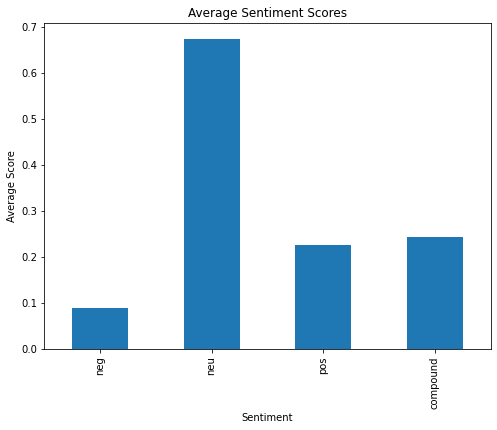

In [27]:
# Plotting the bar graph
plt.figure(figsize=(8, 6))
average_scores.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.title('Average Sentiment Scores')
plt.show()

# Till here#

In [22]:
# Function to determine sentiment category ('pos', 'neg', or 'neu')
def get_sentiment_category(score):
    if score > 0:
        return 'pos'
    elif score < 0:
        return 'neg'
    else:
        return 'neu'

In [23]:
overall_sentiment = sentiment_scores.apply(lambda x: get_sentiment_category(x['compound']))

In [24]:
overall_sentiment 

0         neu
1         pos
2         neu
3         pos
4         pos
         ... 
271257    pos
271258    pos
271259    pos
271260    pos
271261    neu
Name: clean_posts, Length: 271258, dtype: object

In [25]:
print("Overall sentiment:", overall_sentiment.max())
print("Sentiment counts:", overall_sentiment.value_counts())

Overall sentiment: pos
Sentiment counts: clean_posts
pos    163903
neg     61524
neu     45831
Name: count, dtype: int64


In [26]:
df["sentiment_category"] = overall_sentiment

In [27]:
df.head()

Unnamed: 0       id         author created_utc  \
0          0  c1t2qoh      shiftup72  1304911368   
1          1  c1t2xci     JaspaBones  1304913427   
2          2  c1vpoa5  elishawellman  1306229203   
3          3  c1wrsx1  elishawellman  1306741132   
4          4  c53pg9w      minerva_K  1340304552   

                                               posts permalink   link_id  \
0                        also  hot flashes  amirite        NaN  t3_h71nm   
1                from what i hear he s a solid dude        NaN  t3_h71nm   
2  read informative article about menopause and i...       NaN  t3_hirtq   
3  great information on how to balance mental sta...       NaN  t3_hnci7   
4  i d be hapy to help moderate  if you like  and...       NaN  t3_vdcl0   

    parent_id  word_count                                        clean_posts  \
0    t3_h71nm           4                           also hot flashes amirite   
1    t3_h71nm           8                                    hear solid dude   
2    t3_hirtq           8        read informative article menopause symptoms   
3    t3_hnci7          11  great information balance mental state fluctua...   
4  t1_c53j677          45  hapy help moderate like help flog place defini...   

  sentiment_category  
0                neu  
1                pos  
2                neu  
3                pos  
4                pos

In [ ]:
# Convert sentiment category into numerical representation
def get_valence_score(category):
    if category == 'pos':
        return 1
    elif category == 'neg':
        return -1
    else:
        return 0

# Apply the function to each row abd create a new column
df['valence_score'] = df['sentiment_category'].apply(get_valence_score)

df.head()

In [ ]:
# one hot encode sentiment_category column
one_hot = pd.get_dummies(df['sentiment_category'])

In [ ]:
df_1 = df.copy()
one_hot_sentiment = one_hot.copy()

In [ ]:
# concatenate one hot encoded columns with original df
df_2 = pd.concat([df_1, one_hot_sentiment], axis=1)
df_2

In [ ]:
# # Extract 'posts' and 'sentiment_category' columns
# posts = df_2['posts']
# sentiment_type = df_2['sentiment_category']

# tfidf = TfidfVectorizer()

# # Fit and tranform post data using TF-IDF
# tfidf_matrix = tfidf.fit_transform(posts)

# # Create dataframe with index as sentiment types and columns as most common word for each type
# post_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out(), index = sentiment_type)

# # Find most common word for each personality type
# most_common_word = post_tfidf.idxmax(axis=1)
# print(most_common_word)

In [ ]:
tfidf = TfidfVectorizer()

positive_posts = df_2[df_2['sentiment_category'] == 'pos']['clean_posts']
negative_posts = df_2[df_2['sentiment_category'] == 'neg']['clean_posts']
neutral_posts = df_2[df_2['sentiment_category'] == 'neu']['clean_posts']

In [ ]:
posts = df_2['posts']
sentiment_type = df_2['sentiment_category']

# Fit and transform the positive posts
tfidf_positive = tfidf.fit_transform(positive_posts)

# Fit and transform the negative posts
tfidf_negative = tfidf.fit_transform(negative_posts)

# Fit and transform the neutral posts
tfidf_neutral = tfidf.fit_transform(neutral_posts)

# Print feature names (terms)
print("Features:", tfidf.get_feature_names())


In [36]:
tfidf_positive

<163903x58774 sparse matrix of type '<class 'numpy.float64'>'
	with 3936361 stored elements in Compressed Sparse Row format>

In [34]:
print(positive_top_indices)

#its a nested array!

NameError: name 'positive_top_indices' is not defined

In [ ]:
# Get the top word index for positive sentiment
positive_top_word_index = positive_top_indices[0][0]

# Get the top word for positive sentiment
positive_top_word = positive_feature_names[positive_top_word_index]

# Print the top word for positive sentiment
print("Top word for Positive:", positive_top_word)


In [ ]:
print("Positive top word index:", positive_top_word_index)


In [ ]:
# Print the shape of positive_top_indices
print("Shape of positive_top_indices:", positive_top_indices.shape)

# Print the first few elements of positive_top_indices
print("First few elements of positive_top_indices:", positive_top_indices[:5])

# Print the first few elements of positive_feature_names
print("First few elements of positive_feature_names:", positive_feature_names[:5])


In [ ]:
tfidf_positive

In [ ]:
tfidf_negative

In [ ]:

# Combine all posts (positive, negative, and neutral) into a single list
all_posts = positive_posts.tolist() + negative_posts.tolist() + neutral_posts.tolist()

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform all posts
tfidf_concat = tfidf.fit_transform(all_posts)

# Print the shape of the concatenated matrix
print("Concatenated TF-IDF Matrix Shape:", tfidf_concat.shape)


In [ ]:
# # Create dataframe with index as personality types and columns as most common word for each type
# post_tfidf = pd.DataFrame(tfidf_concat.toarray(), columns = tfidf.get_feature_names_out(), index = sentiment_type)

# # Find most common word for each personality type
# most_common_word = post_tfidf.idxmax(axis=1)
# print(most_common_word)